In [1]:
import pandas as pd

In [2]:
gender_df = pd.read_csv("./Resources/gender_submission.csv")
test_df = pd.read_csv("./Resources/test.csv")
train_df = pd.read_csv("./Resources/train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df[["Survived", "Sex", "Age", "Fare"]].groupby("Sex").mean()

,Survived,Age,Fare
Sex,,,
female,0.742038,27.915709,44.479818
male,0.188908,30.726645,25.523893


ETL on the Empress of Ireland

In [14]:
ireland_df = pd.read_csv("./Resources/empress_of_ireland_passenger_list.csv")

In [6]:
# This Dataset was made by hand so its bound to have some missing or incorrect data in it
# Since I made this dataset with this project in mind, there isn't a lot of ETL to be done on it (other than when I was typing it up)

ireland_df.count()

# The counts appear to be little off

Survived    1469
Pclass      1469
Name        1469
Sex         1468
Age          809
dtype: int64

In [7]:
ireland_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age'], dtype='object')

In [8]:
# I want to check that all the categories are correct
survived_unique = ireland_df["Survived"].unique()
pclass_unique = ireland_df["Pclass"].unique()
sex_unique = ireland_df["Sex"].unique()

print(f"Unique values for 'Survived' (this should be 1,0): {survived_unique}")
print(f"Unique values for 'Pclass' (this should be 0,1,2,3): {pclass_unique}")
print(f"Unique values for 'Sex' (this should be male/female/nan): {sex_unique}")

# Looks like they are

Unique values for 'Survived' (this should be 1,0): [1 0]
Unique values for 'Pclass' (this should be 0,1,2,3): [0 1 2 3]
Unique values for 'Sex' (this should be male/female/nan): ['male' 'female' nan]


In [15]:
ireland_df.head()

,Survived,Pclass,Name,Sex,Age
0,1,0,"Kendall, Henry George",male,NaN
1,0,0,"Steede, Mansfield Richard",male,NaN
2,1,0,"Jones, Edward John",male,NaN
3,0,0,"Williams, Roger",male,NaN
4,1,0,"File, Osmond",male,NaN


In [19]:
# The expected numbers are taken from wikipedia, I've gone over the passenger and crew list that I had and couldn't find anything missing
# so either Wikipedia or the list I was looking at was wrong

ireland_df.loc[ireland_df["Pclass"] == 0].count()
#Missing 3 crew members (expected 420)

Survived    417
Pclass      417
Name        417
Sex         417
Age           0
dtype: int64

In [20]:
ireland_df.loc[ireland_df["Pclass"] == 1].count()
# I have 1 extra 1st class passenger (expected 87)

Survived    88
Pclass      88
Name        88
Sex         88
Age         87
dtype: int64

In [21]:
ireland_df.loc[ireland_df["Pclass"] == 2].count()
# Missing 1 2nd class passenger (expected 253)

Survived    252
Pclass      252
Name        252
Sex         252
Age         234
dtype: int64

In [22]:
# Third class passengers I haven't double checked yet, its a lot of data to go through by hand, and I think this is close enough

ireland_df.loc[ireland_df["Pclass"] == 3].count()
# Missing 5 3rd class pasengers (expected 717)

Survived    712
Pclass      712
Name        712
Sex         711
Age         488
dtype: int64

In [23]:
ireland_df.groupby(["Pclass"]).mean()

,Survived,Age
Pclass,,
0,0.558753,NaN
1,0.375000,39.080460
2,0.194444,30.924786
3,0.185393,29.055266


In [31]:
# Average Age of the survivors

ireland_df.loc[ireland_df["Survived"] == 1].groupby("Pclass").mean()["Age"]

Pclass
0          NaN
1    35.500000
2    31.156250
3    32.440367
Name: Age, dtype: float64

In [32]:
# Average age of those who died

ireland_df.loc[ireland_df["Survived"] == 0].groupby("Pclass").mean()["Age"]

Pclass
0          NaN
1    41.163636
2    30.865054
3    28.081715
Name: Age, dtype: float64

In [26]:
ireland_df.dtypes


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
dtype: object

Now for ETL on the estonia passenger list

In [44]:
estonia_df = pd.read_csv("./Resources/estonia-passenger-list.csv")
estonia_df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [63]:
# Format the names like they are in the Titanic dataset (I don't think we're going to add Mr. or Mrs. like they are in the Titanic and Empress of Ireland)
estonia_df["Name"] = estonia_df["Lastname"].str.title() + ', ' + estonia_df["Firstname"].str.title()

# Change how gender is displayed
estonia_df.loc[estonia_df["Sex"] == "M", "Sex"] = "male"
estonia_df.loc[estonia_df["Sex"] == "F", "Sex"] = "female"

# Change the column called Category to Pclass that only contains 1 (for passenger) and 0 (for crew) to match the Empress of Ireland dataset

estonia_df.rename(columns = {"Category":"Pclass"}, inplace=True)

estonia_df.loc[estonia_df["Pclass"] == "P", "Pclass"] = 1
estonia_df.loc[estonia_df["Pclass"] == "C", "Pclass"] = 0

estonia_df = estonia_df.astype({"Pclass": int})

estonia_df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Pclass,Survived,Name
0,1,Sweden,ARVID KALLE,AADLI,male,62,1,0,"Aadli, Arvid Kalle"
1,2,Estonia,LEA,AALISTE,female,22,0,0,"Aaliste, Lea"
2,3,Estonia,AIRI,AAVASTE,female,21,0,0,"Aavaste, Airi"
3,4,Sweden,JURI,AAVIK,male,53,0,0,"Aavik, Juri"
4,5,Sweden,BRITTA ELISABET,AHLSTROM,female,55,1,0,"Ahlstrom, Britta Elisabet"


In [71]:
new_estonia_df = estonia_df[["Survived", "Pclass", "Name", "Sex", "Age"]]
new_estonia_df.head()

,Survived,Pclass,Name,Sex,Age
0,0,1,"Aadli, Arvid Kalle",male,62
1,0,0,"Aaliste, Lea",female,22
2,0,0,"Aavaste, Airi",female,21
3,0,0,"Aavik, Juri",male,53
4,0,1,"Ahlstrom, Britta Elisabet",female,55


In [72]:
new_estonia_df.dtypes

Survived     int64
Pclass       int64
Name        object
Sex         object
Age          int64
dtype: object

In [75]:
new_estonia_df["Survived"].unique()

array([0, 1])

In [56]:
# Now save the cleaned dataframe

new_estonia_df.to_csv("./Resources/estonia-passenger-list-cleaned.csv", index=False)

Machhine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Load up the csv files from the database

estonia = pd.read_csv("./Resources/estonia-passenger-list-cleaned.csv")
ireland = pd.read_csv("./Resources/empress_of_ireland_passenger_list.csv")

titanic_train = pd.read_csv("./Resources/train.csv")
titanic_test = pd.read_csv("./Resources/test.csv")

survived = pd.read_csv("./Resources/gender_submission.csv")

titanic_test = titanic_test.set_index("PassengerId").join(survived.set_index("PassengerId"), on="PassengerId")

In [21]:
columns = estonia.columns

titanic_test = titanic_test[columns]
titanic_train = titanic_train[columns]

titanic_train.head()

titanic_combined = pd.concat([titanic_test, titanic_train])

In [22]:
categoricals = titanic_combined[["Survived", "Pclass", "Sex", "Age"]].astype({"Pclass":"str"}).select_dtypes(exclude=['int64', 'float64'])
categorical_dummies = pd.get_dummies(categoricals, drop_first=False)

numericals = titanic_combined.drop(categoricals,axis=1)[["Survived","Age"]]

titanic_categorical= pd.concat([numericals, categorical_dummies], axis=1)

# Pclass_0 is used in the empress of ireland and the estonia dataset to describe crew
titanic_categorical["Pclass_0"] = 0
titanic_categorical.head()


,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Pclass_0
892,0,34.5,0,0,1,0,1,0
893,1,47.0,0,0,1,1,0,0
894,0,62.0,0,1,0,0,1,0
895,0,27.0,0,0,1,0,1,0
896,1,22.0,0,0,1,1,0,0


In [23]:
categoricals = ireland[["Survived", "Pclass", "Sex", "Age"]].astype({"Pclass":"str"}).select_dtypes(exclude=['int64', 'float64'])
categorical_dummies = pd.get_dummies(categoricals, drop_first=False)

numericals = ireland.drop(categoricals,axis=1)[["Survived","Age"]]

ireland_categorical = pd.concat([numericals, categorical_dummies], axis=1)
ireland_categorical.head()

,Survived,Age,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,NaN,1,0,0,0,0,1
1,0,NaN,1,0,0,0,0,1
2,1,NaN,1,0,0,0,0,1
3,0,NaN,1,0,0,0,0,1
4,1,NaN,1,0,0,0,0,1


In [24]:
categoricals = estonia[["Survived", "Pclass", "Sex", "Age"]].astype({"Pclass":"str"}).select_dtypes(exclude=['int64', 'float64'])
categorical_dummies = pd.get_dummies(categoricals, drop_first=False)

numericals = estonia.drop(categoricals,axis=1)[["Survived","Age"]]

estonia_categorical = pd.concat([numericals, categorical_dummies], axis=1)

# The estonia only had information about crew and passengers, we decided make all the passengers 2nd class as a middle ground between 1st and 3rd, so we have to rename this column
estonia_categorical.rename({"Pclass_1":"Pclass_3"}, axis=1, inplace=True)

estonia_categorical["Pclass_1"] = 0
estonia_categorical["Pclass_2"] = 0

# We also want to reorder the columns to match each other, using the column order from the empress of ireland dataset

estonia_categorical = estonia_categorical[ireland_categorical.columns]
titanic_categorical = titanic_categorical[ireland_categorical.columns]

estonia_categorical.head()

,Survived,Age,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,62,0,0,0,1,0,1
1,0,22,1,0,0,0,1,0
2,0,21,1,0,0,0,1,0
3,0,53,1,0,0,0,0,1
4,0,55,0,0,0,1,1,0


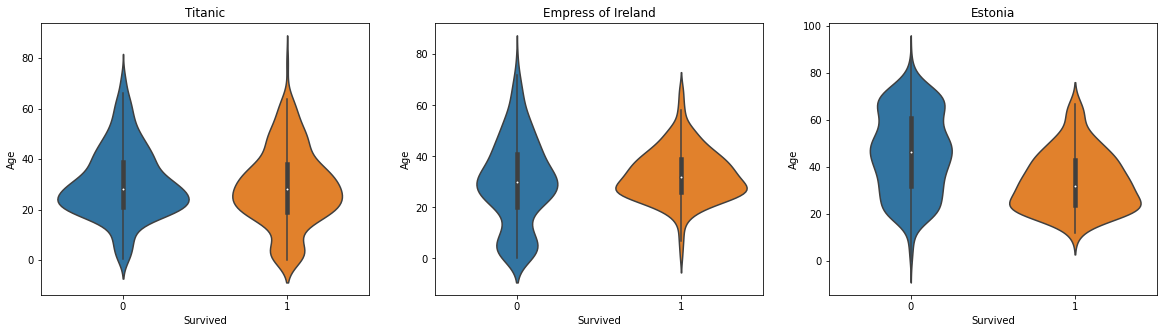

In [25]:
# Violin plot of the distribution of ages among those who survived or didn't 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(data=titanic_combined, x="Survived",y="Age", ax=ax1)
ax1.set_title("Titanic")

sns.violinplot(data=ireland, x="Survived",y="Age", ax=ax2)
ax2.set_title("Empress of Ireland")

sns.violinplot(data=estonia, x="Survived",y="Age", ax=ax3)
ax3.set_title("Estonia")

plt.show()

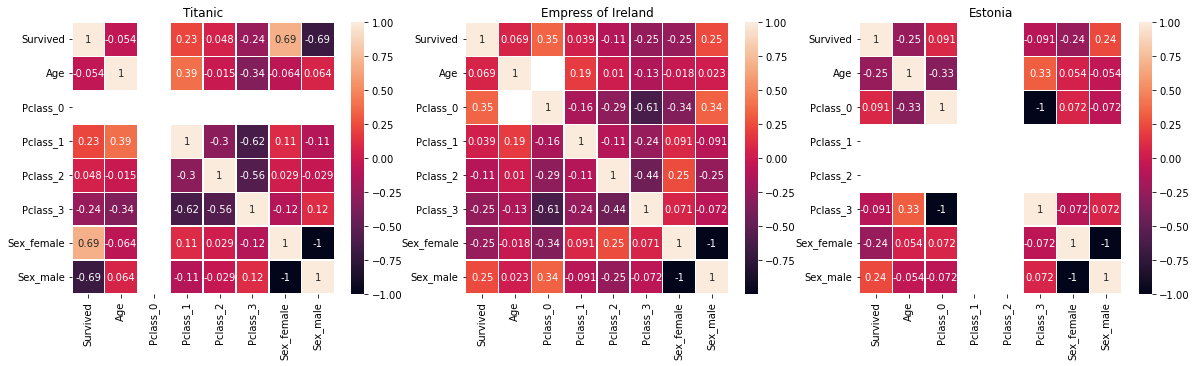

In [26]:
# Correlation heatmap for the Titanic, Empress of Ireland and Estonia

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

titanic_corr = titanic_categorical.corr()
ireland_corr = ireland_categorical.corr()
estonia_corr = estonia_categorical.corr()

sns.heatmap(titanic_corr, ax=ax1, cbar=True, annot=True, linewidth=0.5)
ax1.set_title("Titanic")

sns.heatmap(ireland_corr, ax=ax2, cbar=True, annot=True, linewidth=0.5)
ax2.set_title("Empress of Ireland")

sns.heatmap(estonia_corr,ax=ax3, cbar=True, annot=True, linewidth=0.5)
ax3.set_title("Estonia")

plt.show()

In [27]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
# I've been keeping the empty rows around, but we have to get rid of them before going into machine learning

titanic_categorical.dropna(inplace=True)
ireland_categorical.dropna(inplace=True)
estonia_categorical.dropna(inplace=True)

target_titanic = titanic_categorical["Survived"]
features_titanic = titanic_categorical.drop(["Survived"], axis=1)

target_ireland = ireland_categorical["Survived"]
features_ireland = ireland_categorical.drop(["Survived"], axis=1)

target_estonia = estonia_categorical["Survived"]
features_estonia = estonia_categorical.drop(["Survived"], axis=1)

In [29]:
features_titanic.head()

,Age,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
892,34.5,0,0,0,1,0,1
893,47.0,0,0,0,1,1,0
894,62.0,0,0,1,0,0,1
895,27.0,0,0,0,1,0,1
896,22.0,0,0,0,1,1,0


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


import tensorflow as tf

import keras_tuner
from tensorflow import keras

def create_logistic_regression(features, target, random_state=0):
    clf = LogisticRegression(random_state=0)

    clf.fit(features, target)

    return clf

def create_random_forest(features, target, random_state=0):
    clf = RandomForestClassifier(max_depth=2, random_state=0)

    clf.fit(features, target)

    return clf

def create_neural_net(X_train, X_test, y_train, y_test, random_state=0):

    nn=tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=7))
    nn.add(tf.keras.layers.Dense(units=10, activation="relu"))
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    fit_model = nn.fit(X_train, y_train, epochs=20)
    
    return nn

def create_clf(features, target, random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=random_state)

    logistic_regression = create_logistic_regression(X_train, y_train, random_state=random_state)
    random_forest = create_random_forest(X_train, y_train, random_state=random_state)
    nn = create_neural_net( X_train, X_test, y_train, y_test, random_state=random_state)

    return [logistic_regression, random_forest, nn]

def clf_prediction(clf, features, target):
    prediction = clf.predict(features)

    total_correct = 0

    for i in range(len(prediction)):
        if prediction[i] == target.iloc[i]:
            total_correct += 1

    accuracy = total_correct/len(target)
    return accuracy

In [31]:
datasets = {
    "Titanic":{
        "features":features_titanic,
        "target":target_titanic,
        "classifiers":[]
    },
    "Empress of Ireland":{
        "features":features_ireland,
        "target":target_ireland,
        "classifiers":[]
    },
    "Estonia":{
        "features":features_estonia,
        "target":target_estonia,
        "classifiers":[]
    }
}

logistic_regression_accuracy = {
    "trained on titanic":[], 
    "trained on ireland":[], 
    "trained on estonia":[]
}

random_forest_accuracy = {
    "trained on titanic":[], 
    "trained on ireland":[], 
    "trained on estonia":[]
}

nn_accuracy = {
    "trained on titanic":[], 
    "trained on ireland":[], 
    "trained on estonia":[]
}

total_accuracy = {
    "trained on titanic":[], 
    "trained on ireland":[], 
    "trained on estonia":[]
}

In [32]:
datasets["Titanic"]["classifiers"] = create_clf(datasets["Titanic"]["features"], datasets["Titanic"]["target"])
datasets["Empress of Ireland"]["classifiers"] = create_clf(datasets["Empress of Ireland"]["features"], datasets["Empress of Ireland"]["target"])
datasets["Estonia"]["classifiers"] = create_clf(datasets["Estonia"]["features"], datasets["Estonia"]["target"])

def create_accuracy_row(clf):

    results = [
        clf_prediction(clf, datasets["Titanic"]["features"], datasets["Titanic"]["target"]),
        clf_prediction(clf, datasets["Empress of Ireland"]["features"], datasets["Empress of Ireland"]["target"]),
        clf_prediction(clf, datasets["Estonia"]["features"], datasets["Estonia"]["target"])
    ]
    return results

def create_accuracy_row_nn(nn):
    results = [
        nn.evaluate(datasets["Titanic"]["features"], datasets["Titanic"]["target"])[1],
        nn.evaluate(datasets["Empress of Ireland"]["features"], datasets["Empress of Ireland"]["target"])[1],
        nn.evaluate(datasets["Estonia"]["features"], datasets["Estonia"]["target"])[1]
    ]
    return results

logistic_regression_accuracy["trained on titanic"] = create_accuracy_row(datasets["Titanic"]["classifiers"][0])
logistic_regression_accuracy["trained on ireland"] = create_accuracy_row(datasets["Empress of Ireland"]["classifiers"][0])
logistic_regression_accuracy["trained on estonia"] = create_accuracy_row(datasets["Estonia"]["classifiers"][0])

random_forest_accuracy["trained on titanic"] = create_accuracy_row(datasets["Titanic"]["classifiers"][1])
random_forest_accuracy["trained on ireland"] = create_accuracy_row(datasets["Empress of Ireland"]["classifiers"][1])
random_forest_accuracy["trained on estonia"] = create_accuracy_row(datasets["Estonia"]["classifiers"][1])

nn_accuracy["trained on titanic"] = create_accuracy_row_nn(datasets["Titanic"]["classifiers"][2])
nn_accuracy["trained on ireland"] = create_accuracy_row_nn(datasets["Empress of Ireland"]["classifiers"][2])
nn_accuracy["trained on estonia"] = create_accuracy_row_nn(datasets["Estonia"]["classifiers"][2])



Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 1.1126 - accuracy: 0.4171
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.6747
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7041
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.8214
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.7883
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.8023
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8342
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.8444
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.8418
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4814 - accuracy: 0.8457
Epoch 11/20
25/25 [

In [33]:
lr_accuracy_df = pd.DataFrame(logistic_regression_accuracy)
lr_accuracy_df.index = ["tested on titanic", "tested on ireland", "tested on estonia"]

rf_accuracy_df = pd.DataFrame(random_forest_accuracy)
rf_accuracy_df.index = ["tested on titanic", "tested on ireland", "tested on estonia"]

nn_accuracy_df = pd.DataFrame(nn_accuracy)
nn_accuracy_df.index = ["tested on titanic", "tested on ireland", "tested on estonia"]


Text(0.5, 1.0, 'Neural Net')

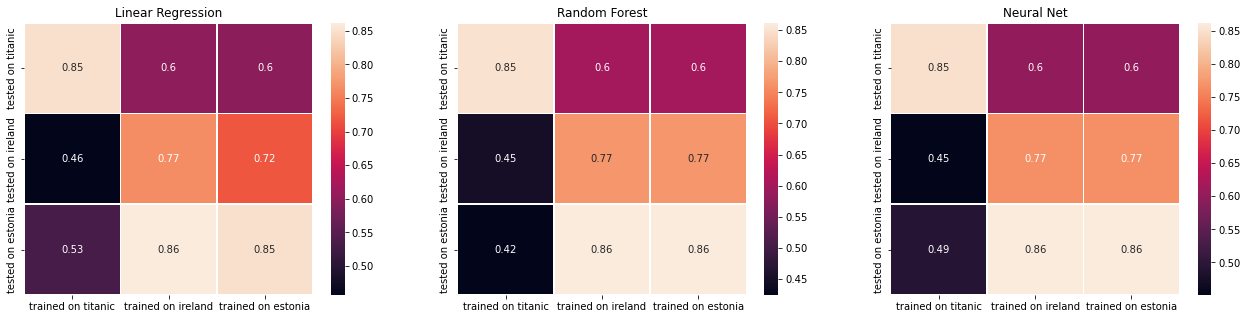

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(22,5))

sns.heatmap(lr_accuracy_df, ax=ax1, cbar=True, annot=True, linewidth=0.5)
ax1.set_title("Logistic Regression")

sns.heatmap(rf_accuracy_df, ax=ax2, cbar=True, annot=True, linewidth=0.5)
ax2.set_title("Random Forest")

sns.heatmap(nn_accuracy_df, ax=ax3, cbar=True, annot=True, linewidth=0.5)
ax3.set_title("Neural Net")

This block of code is defunct, do not use

In [55]:
model = KMeans(n_clusters=2, random_state=0)

model.fit(features_titanic)

predictions = model.predict(features_titanic)

model.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [56]:
total_correct = 0
total_wrong = 0

for i in range(len(target_titanic)):
    if target_titanic.iloc[i] == model.labels_[i]:
        total_correct += 1
    else:
        total_wrong += 1

print(f"Kmeans clustering got the survivors right {total_correct} out of {len(target_titanic)} times and wrong {total_wrong}")

# Kmeans did not cluser around survivorship, so this is pretty much useless

Kmeans clustering got the survivors right 492 out of 1046 times and wrong 554


In [67]:
# Lets try logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_titanic, target_titanic, random_state=0)

clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)

prediction = clf.predict(X_test)


In [68]:
total_correct = 0

for i in range(len(prediction)):
    if prediction[i] == y_test.iloc[i]:
        total_correct += 1

print(f"""Linear regression prediction got {total_correct} right out of {len(y_test)}
for an accuracy of {round(((total_correct/len(y_test)) * 100),2)}%""")

Linear regression prediction got 221 right out of 262
for an accuracy of 84.35%


In [69]:
# Okay logistic regression is pretty accurate, lets test it against the Empress of Ireland

ireland_prediction = clf.predict(features_ireland)

total_correct = 0

for i in range(len(prediction)):
    if ireland_prediction[i] == target_ireland.iloc[i]:
        total_correct += 1

print(f"""Linear regression prediction got {total_correct} right out of {len(y_test)}
for an accuracy of {round(((total_correct/len(y_test)) * 100),2)}%""")

# Okay, this one did terrible too


Linear regression prediction got 111 right out of 262
for an accuracy of 42.37%


In [74]:
titanic_categorical.dropna(inplace=True)
ireland_categorical.dropna(inplace=True)
estonia_categorical.dropna(inplace=True)


target_titanic = titanic_categorical["Survived"]
features_titanic = titanic_categorical[["Age", "Sex_female","Sex_male"]]

target_ireland = ireland_categorical["Survived"]
features_ireland = ireland_categorical[["Age", "Sex_female","Sex_male"]]

target_estonia = estonia_categorical["Survived"]
features_estonia = estonia_categorical[["Age", "Sex_female","Sex_male"]]

X_train, X_test, y_train, y_test = train_test_split(features_titanic, target_titanic, random_state=0)

clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)

def clf_prediction(features, target):
    prediction = clf.predict(features)

    total_correct = 0

    for i in range(len(prediction)):
        if prediction[i] == target.iloc[i]:
            total_correct += 1

    accuracy = total_correct/len(target)
    return accuracy

print(f"The Titanic scored an accuracy of: {round((clf_prediction(X_test, y_test)*100),2)}%")
print(f"The Empress of Ireland scored an accuracy of: {round((clf_prediction(features_ireland,target_ireland)*100),2)}%")
print(f"The Estonia scored an accuracy of: {round((clf_prediction(features_estonia, target_estonia)*100),2)}%")

# Conclusion: Logistic regression based on the Titanic does a poor job of predicting survivors of other disasters

The Titanic scored an accuracy of: 84.35%
The Empress of Ireland scored an accuracy of: 44.75%
The Estonia scored an accuracy of: 42.47%


In [80]:
# Random forest model

# We have to redefine the target and features do we can get the Pclass columns back (and leaving out the Estonia for now)

target_titanic = titanic_categorical["Survived"]
features_titanic = titanic_categorical.drop(["Survived"], axis=1)

target_ireland = ireland_categorical["Survived"]
features_ireland = ireland_categorical.drop(["Survived"], axis=1)

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(features_titanic, target_titanic, random_state=0)

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

print(f"The Titanic scored an accuracy of: {round((clf_prediction(X_test, y_test)*100),2)}%")
print(f"The Empress of Ireland scored an accuracy of: {round((clf_prediction(features_ireland,target_ireland)*100),2)}%")

# Random forest got the pretty much the same result as logistic regression

The Titanic scored an accuracy of: 84.35%
The Empress of Ireland scored an accuracy of: 44.87%


In [81]:
target_titanic = titanic_categorical["Survived"]
features_titanic = titanic_categorical[["Age", "Sex_female","Sex_male"]]

target_ireland = ireland_categorical["Survived"]
features_ireland = ireland_categorical[["Age", "Sex_female","Sex_male"]]

target_estonia = estonia_categorical["Survived"]
features_estonia = estonia_categorical[["Age", "Sex_female","Sex_male"]]

X_train, X_test, y_train, y_test = train_test_split(features_titanic, target_titanic, random_state=0)

clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)

print(f"The Titanic scored an accuracy of: {round((clf_prediction(X_test, y_test)*100),2)}%")
print(f"The Empress of Ireland scored an accuracy of: {round((clf_prediction(features_ireland,target_ireland)*100),2)}%")
print(f"The Estonia scored an accuracy of: {round((clf_prediction(features_estonia, target_estonia)*100),2)}%")

# Conclusion: Random Forest classification based on the Titanic does a poor job of predicting survivors of other disasters

# I might be important to note that I removed passenger class and the classifier for both random forest and logistic regression got similar accuracy
# maybe class isn't as important to survivability as we think?

The Titanic scored an accuracy of: 84.35%
The Empress of Ireland scored an accuracy of: 44.75%
The Estonia scored an accuracy of: 42.47%


In [86]:
# Now lets try neural nets

import tensorflow as tf

nn=tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=6))
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn.summary()
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [91]:
target_titanic = titanic_categorical["Survived"]
features_titanic = titanic_categorical.drop(["Survived"], axis=1)

target_ireland = ireland_categorical["Survived"]
features_ireland = ireland_categorical.drop(["Survived"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_titanic, target_titanic, random_state=0)

fit_model = nn.fit(X_train, y_train, epochs=20)

titanic_model_loss, titanic_model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Titanic: Loss: {titanic_model_loss}, Accuracy: {titanic_model_accuracy}")

ireland_model_loss, ireland_model_accuracy = nn.evaluate(features_ireland, target_ireland,verbose=2)
print(f"Empress of Ireland: Loss: {ireland_model_loss}, Accuracy: {ireland_model_accuracy}")

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8584
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8622
Epoch 3/20
25/25 [==============================] - 0s 875us/step - loss: 0.3528 - accuracy: 0.8622
Epoch 4/20
25/25 [==============================] - 0s 879us/step - loss: 0.3522 - accuracy: 0.8571
Epoch 5/20
25/25 [==============================] - 0s 956us/step - loss: 0.3510 - accuracy: 0.8597
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8584
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8597
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8610
Epoch 9/20
25/25 [==============================] - 0s 933us/step - loss: 0.3518 - accuracy: 0.8597
Epoch 10/20
25/25 [==============================] - 0s 965us/step - loss: 0.3519 - accuracy: 0.8661
Epoch 11/

In [94]:
import keras_tuner
from tensorflow import keras

def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units',
            min_value=1,
            max_value=80,
            step=2
        ),
        activation=activation,
        input_dim=6
        ))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i),
                min_value=1,
                max_value=80,
                step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

tuner = keras_tuner.RandomSearch(
    create_model,
    objective="val_accuracy",
    max_trials=5)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


best_model = tuner.get_best_models(1)[0]
titanic_model_loss, titanic_model_accuracy = best_model.evaluate(X_test,y_test,verbose=2)
print(f"Titanic: Loss: {titanic_model_loss}, Accuracy: {titanic_model_accuracy}")

ireland_model_loss, ireland_model_accuracy = best_model.evaluate(features_ireland, target_ireland,verbose=2)
print(f"Empress of Ireland: Loss: {ireland_model_loss}, Accuracy: {ireland_model_accuracy}")

best_model.save_weights("titanic_nn_model.hdf5")

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit
9/9 - 0s - loss: 0.4250 - accuracy: 0.8511
Titanic: Loss: 0.4249940514564514, Accuracy: 0.8511450290679932
26/26 - 0s - loss: 0.8027 - accuracy: 0.4351
Empress of Ireland: Loss: 0.8027485013008118, Accuracy: 0.4351050555706024


In [95]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 37,
 'num_layers': 3,
 'units_0': 43,
 'units_1': 37,
 'units_2': 33,
 'units_3': 31}